In [1]:
import pandas as pd

In [2]:
dataframe = pd.DataFrame()

In [3]:
DATASET_IRIS = "iris.csv"
iris_dataset = pd.read_csv(DATASET_IRIS)
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Dividir el conjunto de datos en dataframes distintos segun la especie
setosa_df = iris_dataset.groupby('species').get_group('setosa')
virginica_df = iris_dataset.groupby('species').get_group('virginica')
versicolor_df = iris_dataset.groupby('species').get_group('versicolor')

print("Setosa:")
print(setosa_df)

print("Versicolor:")
print(versicolor_df)

print("Virginica:")
print(virginica_df)

Setosa:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8 

In [ ]:
# Seleccionamos un 20% de datos aleatorios del DF de cada especie (10 elementos de 50 total)
setosa_test = setosa_df.sample(n=10) # considerar el uso de seed = setosa_sample = setosa_data.sample(n=10, random_state=42)
versicolor_test = versicolor_df.sample(frac=0.2) # en teoria si ocupo semilla, lo de abajo no seria necesario
virginica_test = virginica_df.sample(frac=0.2)

#Verificamos que no haya datos repetidos en la extraccion aleatoria de datos (falta un ciclo do while)
if setosa_test.index.is_unique and  versicolor_test.index.is_unique and virginica_test.index.is_unique:
    print("No hay valores repetidos en los test")
    print("TEST Setosa:")
    print(setosa_test)

    print("TEST Versicolor:")
    print(versicolor_test)

    print("TEST Virginica:")
    print(virginica_test)
else:
    print("Hay valores repetidos en algunos de los test")
    setosa_test = setosa_df.sample(frac=0.2)
    versicolor_test = versicolor_df.sample(frac=0.2)
    virginica_test = virginica_df.sample(frac=0.2)

In [27]:
# Concatenar los tres subconjuntos de test para crear un DF de 30 elementos con los 10 de cada especies seleccionados aleatoriamente 
species_test = pd.concat([setosa_test, versicolor_test, virginica_test])

species_test

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
44,5.1,3.8,1.9,0.4,setosa
0,5.1,3.5,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa


In [28]:
dataset_withoutTestSpecies = iris_dataset.drop(species_test.index)

dataset_withoutTestSpecies

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica


<Axes: >

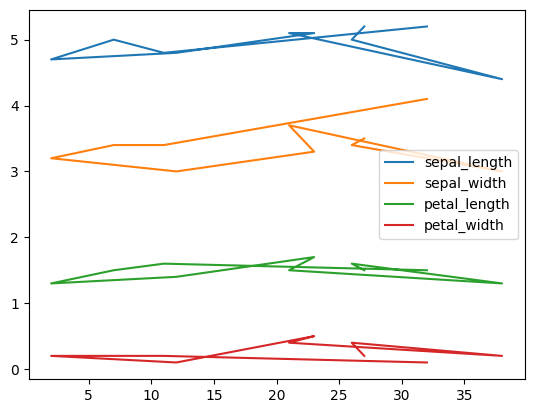

In [53]:
import matplotlib.pyplot as plt 
plt.close("all")
setosa_test.plot()